In [1]:
import pandas as pd
import numpy as np
import time
import joblib
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tabulate import tabulate
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
import gc
import keras_tuner
from keras_tuner import HyperModel
from keras_tuner.tuners import RandomSearch

In [2]:
df5=pd.read_csv('df_reduced_multiclass.csv', low_memory=False)

In [7]:
######################## Preprocessing & EDA PART ##################################

In [3]:
df5.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,...,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,target
0,0x00000018,0.998867,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
1,0x00000010,0.000067,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
2,0x00000010,0.000058,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
3,0x00000018,0.000227,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
4,0x00000018,0.000236,16,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos


In [4]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330936 entries, 0 to 330935
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   tcp.flags                   330936 non-null  object 
 1   tcp.time_delta              330936 non-null  float64
 2   tcp.len                     330936 non-null  int64  
 3   mqtt.conack.flags           330936 non-null  object 
 4   mqtt.conack.flags.reserved  330936 non-null  float64
 5   mqtt.conack.flags.sp        330936 non-null  float64
 6   mqtt.conack.val             330936 non-null  float64
 7   mqtt.conflag.cleansess      330936 non-null  float64
 8   mqtt.conflag.passwd         330936 non-null  float64
 9   mqtt.conflag.qos            330936 non-null  float64
 10  mqtt.conflag.reserved       330936 non-null  float64
 11  mqtt.conflag.retain         330936 non-null  float64
 12  mqtt.conflag.uname          330936 non-null  float64
 13  mqtt.conflag.w

In [6]:
missing_data =df5.isnull().sum() 
print(missing_data)

Missing data:
tcp.flags                     0
tcp.time_delta                0
tcp.len                       0
mqtt.conack.flags             0
mqtt.conack.flags.reserved    0
mqtt.conack.flags.sp          0
mqtt.conack.val               0
mqtt.conflag.cleansess        0
mqtt.conflag.passwd           0
mqtt.conflag.qos              0
mqtt.conflag.reserved         0
mqtt.conflag.retain           0
mqtt.conflag.uname            0
mqtt.conflag.willflag         0
mqtt.conflags                 0
mqtt.dupflag                  0
mqtt.hdrflags                 0
mqtt.kalive                   0
mqtt.len                      0
mqtt.msg                      0
mqtt.msgid                    0
mqtt.msgtype                  0
mqtt.proto_len                0
mqtt.protoname                0
mqtt.qos                      0
mqtt.retain                   0
mqtt.sub.qos                  0
mqtt.suback.qos               0
mqtt.ver                      0
mqtt.willmsg                  0
mqtt.willmsg_len          

In [8]:
df5.describe()

,tcp.time_delta,tcp.len,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,mqtt.conflag.reserved,mqtt.conflag.retain,...,mqtt.proto_len,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len
count,330936.000000,330936.000000,330936.0,330936.0,330936.000000,330936.000000,330936.000000,330936.0,330936.0,330936.0,...,330936.000000,330936.000000,330936.000000,330936.0,330936.0,330936.000000,330936.0,330936.0,330936.0,330936.0
mean,0.271595,152.566862,0.0,0.0,0.021575,0.009917,0.004297,0.0,0.0,0.0,...,0.039669,0.164476,0.000366,0.0,0.0,0.039669,0.0,0.0,0.0,0.0
std,2.835911,945.491750,0.0,0.0,0.327736,0.099091,0.065410,0.0,0.0,0.0,...,0.396364,0.370707,0.019118,0.0,0.0,0.396364,0.0,0.0,0.0,0.0
min,-0.000002,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
25%,0.000003,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
50%,0.000026,10.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
75%,0.000169,14.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
max,60.000878,32768.000000,0.0,0.0,5.000000,1.000000,1.000000,0.0,0.0,0.0,...,4.000000,1.000000,1.000000,0.0,0.0,4.000000,0.0,0.0,0.0,0.0


From the description table, some columns have a zero mean and zero standard deviation (std), indicating they are constant or exhibit minimal variation. These features do not contribute meaningful information for predictive modeling. 
Thus, we identified all such columns and removed them from the dataset.

In [10]:
description = df5.describe()
zero_mean = description.loc['mean'] == 0
zero_std  = description.loc['std'] == 0
columns_with_zero_mean_and_zero_std = description.columns[zero_mean & zero_std]
print(columns_with_zero_mean_and_zero_std)
print (f"Total number of constant columns is :{len(columns_with_zero_mean_and_zero_std)}")


Index(['mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp',
       'mqtt.conflag.qos', 'mqtt.conflag.reserved', 'mqtt.conflag.retain',
       'mqtt.conflag.willflag', 'mqtt.sub.qos', 'mqtt.suback.qos',
       'mqtt.willmsg', 'mqtt.willmsg_len', 'mqtt.willtopic',
       'mqtt.willtopic_len'],
      dtype='object')
Total number of constant columns is :12


In [12]:
# Dropping the constant columns and forming new dataframe

df2 = df5.drop(columns=columns_with_zero_mean_and_zero_std) 

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330936 entries, 0 to 330935
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   tcp.flags               330936 non-null  object 
 1   tcp.time_delta          330936 non-null  float64
 2   tcp.len                 330936 non-null  int64  
 3   mqtt.conack.flags       330936 non-null  object 
 4   mqtt.conack.val         330936 non-null  float64
 5   mqtt.conflag.cleansess  330936 non-null  float64
 6   mqtt.conflag.passwd     330936 non-null  float64
 7   mqtt.conflag.uname      330936 non-null  float64
 8   mqtt.conflags           330936 non-null  object 
 9   mqtt.dupflag            330936 non-null  float64
 10  mqtt.hdrflags           330936 non-null  object 
 11  mqtt.kalive             330936 non-null  float64
 12  mqtt.len                330936 non-null  float64
 13  mqtt.msg                330936 non-null  object 
 14  mqtt.msgid          

In [14]:
target_counts = df2['target'].value_counts()
print("\nValue counts of target:")
print(target_counts)


Value counts of target:
legitimate    165463
dos           130233
bruteforce     14501
malformed      10924
slowite         9202
flood            613
Name: target, dtype: int64


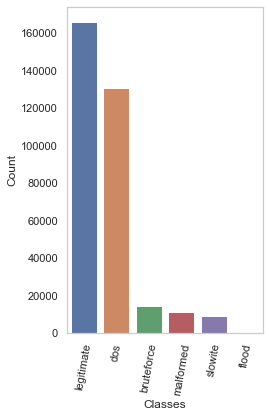

In [15]:
total = len(df2)
counts = df2['target'].value_counts()
percentages = counts / total * 100
plt.rcParams['font.family'] = 'Times New Roman'
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(3.5, 6))
ax = sns.countplot(x=df2['target'], order=counts.index)
plt.xticks(rotation=80)
plt.xlabel('Classes')
plt.ylabel('Count')
for p, percentage in zip(ax.patches, percentages):
    count = p.get_height()
plt.grid(False)
path = '/Users/A/Documents/TEP/Figures/Multi-Trafficdistribution.png'
plt.savefig(path, bbox_inches='tight')
plt.show()

####### Categorical vs Numerical features

In [17]:
cat_cols= df2.select_dtypes(include=['object']).columns
num_cols = df2.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['tcp.flags', 'mqtt.conack.flags', 'mqtt.conflags', 'mqtt.hdrflags',
       'mqtt.msg', 'mqtt.protoname', 'target'],
      dtype='object')
Numerical Variables:
['tcp.time_delta', 'tcp.len', 'mqtt.conack.val', 'mqtt.conflag.cleansess', 'mqtt.conflag.passwd', 'mqtt.conflag.uname', 'mqtt.dupflag', 'mqtt.kalive', 'mqtt.len', 'mqtt.msgid', 'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.qos', 'mqtt.retain', 'mqtt.ver']


In [18]:
# Categorical Variables: Index(['tcp.flags', 'mqtt.conack.flags', 'mqtt.conflags', 'mqtt.hdrflags'] contain hexadecimal string 
# we convert this string to decinmal to make them numerical

In [19]:
def hex_to_int(value): # to convert hexadecimal string to integer
    if isinstance(value, str) and value.startswith('0x'):
        return int(value, 16)
    else:
        return int(value)
    
columns_to_convert = ['tcp.flags', 'mqtt.conack.flags', 'mqtt.conflags', 'mqtt.hdrflags']

df3 = df2.copy() # Creating a copy of df2 for df3

for col in columns_to_convert:
    df3[col] = df3[col].apply(hex_to_int)

In [20]:
cat_cols= df3.select_dtypes(include=['object']).columns
num_cols = df3.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['mqtt.msg', 'mqtt.protoname', 'target'], dtype='object')
Numerical Variables:
['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.conack.flags', 'mqtt.conack.val', 'mqtt.conflag.cleansess', 'mqtt.conflag.passwd', 'mqtt.conflag.uname', 'mqtt.conflags', 'mqtt.dupflag', 'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msgid', 'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.qos', 'mqtt.retain', 'mqtt.ver']


In [21]:
protoname_counts = df3['mqtt.protoname'].value_counts()
print("\nValue counts of mqtt.protoname:")
print(protoname_counts)


Value counts of mqtt.protoname:
0       327654
MQTT      3282
Name: mqtt.protoname, dtype: int64


In [22]:
df4 = df3.copy()
df4.loc[df4['mqtt.protoname'] == 'MQTT', 'mqtt.protoname'] = 1 #replacing 'MQTT' with "1"
df4['mqtt.protoname'] = pd.to_numeric(df4['mqtt.protoname'], errors='coerce') 

In [23]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330936 entries, 0 to 330935
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   tcp.flags               330936 non-null  int64  
 1   tcp.time_delta          330936 non-null  float64
 2   tcp.len                 330936 non-null  int64  
 3   mqtt.conack.flags       330936 non-null  int64  
 4   mqtt.conack.val         330936 non-null  float64
 5   mqtt.conflag.cleansess  330936 non-null  float64
 6   mqtt.conflag.passwd     330936 non-null  float64
 7   mqtt.conflag.uname      330936 non-null  float64
 8   mqtt.conflags           330936 non-null  int64  
 9   mqtt.dupflag            330936 non-null  float64
 10  mqtt.hdrflags           330936 non-null  int64  
 11  mqtt.kalive             330936 non-null  float64
 12  mqtt.len                330936 non-null  float64
 13  mqtt.msg                330936 non-null  object 
 14  mqtt.msgid          

In [24]:
cat_cols= df4.select_dtypes(include=['object']).columns
num_cols = df4.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['mqtt.msg', 'target'], dtype='object')
Numerical Variables:
['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.conack.flags', 'mqtt.conack.val', 'mqtt.conflag.cleansess', 'mqtt.conflag.passwd', 'mqtt.conflag.uname', 'mqtt.conflags', 'mqtt.dupflag', 'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msgid', 'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.qos', 'mqtt.retain', 'mqtt.ver']


In [25]:
df4.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.uname,mqtt.conflags,mqtt.dupflag,...,mqtt.len,mqtt.msg,mqtt.msgid,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.qos,mqtt.retain,mqtt.ver,target
0,24,0.998867,10,0,0.0,0.0,0.0,0.0,0,0.0,...,8.0,32,0.0,3.0,0.0,0,0.0,0.0,0.0,legitimate
1,16,0.000067,1460,0,0.0,0.0,0.0,0.0,0,0.0,...,169.0,6361653943666144654266454162444634326230633041...,2714.0,3.0,0.0,0,1.0,0.0,0.0,dos
2,16,0.000058,1460,0,0.0,0.0,0.0,0.0,0,0.0,...,163.0,4232646141394333463334613232626446326646383446...,1548.0,3.0,0.0,0,1.0,0.0,0.0,dos
3,24,0.000227,10,0,0.0,0.0,0.0,0.0,0,0.0,...,8.0,32,0.0,3.0,0.0,0,0.0,0.0,0.0,legitimate
4,24,0.000236,16,0,0.0,0.0,0.0,0.0,0,0.0,...,2.0,0,2800.0,4.0,0.0,0,0.0,0.0,0.0,dos


In [26]:
df6 = df4.drop(columns=['mqtt.msg'])
# Separating the data based on the target variable
df6_normal = df6[df6['target'] == 'legitimate']
df6_attack = df6[df6['target'] != 'legitimate']


 #isolating target column
    
def calculate_statistics(df6):    # Function to calculate statistical characteristics
    num_cols_2 = df6.select_dtypes(include=np.number).columns.tolist()
        
    stats = pd.DataFrame()
    stats['mean'] = df6[num_cols_2].mean()
    stats['std'] = df6[num_cols_2].std()
    stats['skewness'] = df6[num_cols_2].apply(lambda x: skew(x.dropna()))
    stats['kurtosis'] = df6[num_cols_2].apply(lambda x: kurtosis(x.dropna()))
    return stats

# Calculating statistics for normal and attack data
normal_stats = calculate_statistics(df6_normal)
attack_stats = calculate_statistics(df6_attack)

stats_diff = abs(normal_stats - attack_stats) # The difference in statistics

stats_diff['sum_diff'] = stats_diff.sum(axis=1) # Sum of differences for each feature

threshold = 200  # Defining threshold for feature selection

# Selecting the features with sum of differences above the threshold
significant_features = stats_diff[stats_diff['sum_diff'] > threshold].index.tolist()
df_significant = df6[significant_features + ['target']]

In [27]:
stats=calculate_statistics(df6)
print(stats)

                               mean          std   skewness     kurtosis
tcp.flags                 20.278906     4.474610  -0.967318     1.291809
tcp.time_delta             0.271595     2.835911  20.269241   415.634187
tcp.len                  152.566862   945.491750  28.063691   937.082640
mqtt.conack.flags          0.000000     0.000000   0.000000    -3.000000
mqtt.conack.val            0.021575     0.327736  15.124557   226.752233
mqtt.conflag.cleansess     0.009917     0.099091   9.891595    95.843655
mqtt.conflag.passwd        0.004297     0.065410  15.156848   227.730054
mqtt.conflag.uname         0.004309     0.065501  15.135298   227.077259
mqtt.conflags              0.846387    12.697601  15.137627   227.211502
mqtt.dupflag               0.056528     0.230938   3.840626    12.750405
mqtt.hdrflags             33.493760    30.141838   1.173012     5.984471
mqtt.kalive              201.608529  3625.591571  17.964557   320.726037
mqtt.len                  31.703039    61.542514   

In [28]:
df_significant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330936 entries, 0 to 330935
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tcp.time_delta  330936 non-null  float64
 1   tcp.len         330936 non-null  int64  
 2   mqtt.kalive     330936 non-null  float64
 3   mqtt.msgid      330936 non-null  float64
 4   mqtt.retain     330936 non-null  float64
 5   target          330936 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 15.1+ MB


In [29]:
df_significant.head()

,tcp.time_delta,tcp.len,mqtt.kalive,mqtt.msgid,mqtt.retain,target
0,0.998867,10,0.0,0.0,0.0,legitimate
1,0.000067,1460,0.0,2714.0,0.0,dos
2,0.000058,1460,0.0,1548.0,0.0,dos
3,0.000227,10,0.0,0.0,0.0,legitimate
4,0.000236,16,0.0,2800.0,0.0,dos


In [30]:
df_significant = df5[significant_features + ['target']].copy()

In [31]:
        ######################## TRAINING AND TESTING PART ##################################

In [32]:
label_encoder = LabelEncoder()
df_significant.loc[:,'target']= label_encoder.fit_transform(df_significant['target'])
X = df_significant.drop(columns=['target'])
y = df_significant['target']

In [33]:

#Scaling features 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # Splitting the data 



In [38]:
########################### Random Forest Classifier ###############################################

In [43]:
# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42) 

# GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


training_start_time = time.time() #searching  start time
grid_search_rf.fit(X_train, y_train)
training_end_time = time.time() 

training_elapsed_time = training_end_time - training_start_time

print(f"The training took {training_elapsed_time:.2f} seconds")


testing_start_time = time.time() #testing starting time
best_model = grid_search_rf.best_estimator_
y_pred_rf = best_model.predict(X_test)
testing_end_time = time.time()
testing_elapsed_time = testing_end_time - testing_start_time

print(f"The testing took {testing_elapsed_time:.2f} seconds")

# Best parameters#
print("Best parameters found: ", grid_search_rf.best_params_)

# Best estimator
print("Best estimator: ", grid_search_rf.best_estimator_)

########################################################

# Model Evaluation Metrics

print("accuracy")
print(accuracy_score(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
The training took 1547.43 seconds
The training took 1.73 seconds
Best parameters found:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best estimator:  RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)
accuracy
0.9077064090812945

Classification Report:
              precision    recall  f1-score   support

  bruteforce       0.64      0.66      0.65      4350
         dos       0.92      0.91      0.92     39070
       flood       1.00      0.46      0.63       184
  legitimate       0.92      0.99      0.95     49639
   malformed       0.80      0.33      0.47      3277
     slowite       0.84      0.50      0.63      2761

    accuracy                           0.91     99281
   macro avg       0.85      0.64      0.71     99281
weighted avg       0.90      0.91      0.90     9

In [34]:
best_params = {
    'bootstrap': True,
    'max_depth': 20,
    'min_samples_leaf': 2,
    'min_samples_split': 5,
    'n_estimators': 200
}

b_rf_model = RandomForestClassifier(random_state=42, **best_params)

training_start_time = time.time()
b_rf_model.fit(X_train, y_train)
training_end_time = time.time()
training_elapsed_time = training_end_time - training_start_time
print(f"The training took {training_elapsed_time:.2f} seconds")

testing_start_time = time.time()
y_pred_brf = b_rf_model.predict(X_test)
testing_end_time = time.time()

testing_elapsed_time = testing_end_time - testing_start_time
print(f"The testing took {testing_elapsed_time:.2f} seconds")

print("accuracy")
print(accuracy_score(y_test, y_pred_brf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_brf, target_names=label_encoder.classes_))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_brf))

The training took 16.48 seconds
The testing took 1.13 seconds
accuracy
0.9077064090812945

Classification Report:
              precision    recall  f1-score   support

  bruteforce       0.64      0.66      0.65      4350
         dos       0.92      0.91      0.92     39070
       flood       1.00      0.46      0.63       184
  legitimate       0.92      0.99      0.95     49639
   malformed       0.80      0.33      0.47      3277
     slowite       0.84      0.50      0.63      2761

    accuracy                           0.91     99281
   macro avg       0.85      0.64      0.71     99281
weighted avg       0.90      0.91      0.90     99281


Confusion Matrix:
[[ 2854  1020     0   170   204   102]
 [  392 35734     0  2838    29    77]
 [    3    20    85    74     2     0]
 [    3   653     0 48977     6     0]
 [ 1029   820     0   256  1083    89]
 [  147   513     0   682    34  1385]]


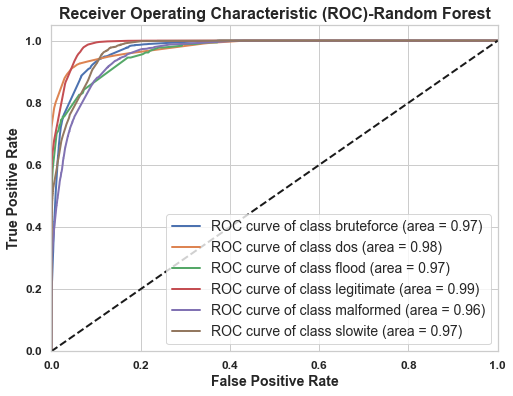

In [43]:
# Computing ROC curve and ROC area for each class- RF Model
n_classes = len(label_encoder.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, b_rf_model.predict_proba(X_test)[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, b_rf_model.predict_proba(X_test)[:, i])

# Plotting ROC curve
plt.figure(figsize=(8, 6))  
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {label_encoder.classes_[i]} (area = {roc_auc[i]:0.2f})', linewidth=2)  

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('Receiver Operating Characteristic (ROC)-Random Forest', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')  
plt.yticks(fontsize=12, fontweight='bold') 
plt.legend(loc="lower right", fontsize=14) 

path = '/Users/A/Documents/TEP/Figures/DPI/Multi-ROC-RF.png' 
plt.savefig(path, bbox_inches='tight', dpi=300)

plt.show()

In [46]:
    ##---------------2-- Logistic Regression -----------------##

In [47]:
# Defining the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1.0, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

lr = LogisticRegression(random_state=42) ## Initializing Logistic Regression

# GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


training_start_time = time.time() #searching start time
grid_search_lr.fit(X_train, y_train)
training_end_time = time.time() 

training_elapsed_time = training_end_time - training_start_time

print(f"The training took {training_elapsed_time:.2f} seconds")


testing_start_time = time.time() #testing starting time
best_model_lr = grid_search_lr.best_estimator_
y_pred_lr = best_model_lr.predict(X_test)
testing_end_time = time.time()#
testing_elapsed_time = testing_end_time - testing_start_time

print(f"The testing took {testing_elapsed_time:.2f} seconds")

# Best parameters#
print("Best parameters found: ", grid_search_lr.best_params_)

# Best estimator
print("Best estimator: ", grid_search_lr.best_estimator_)

########################################################

# Model Evaluation Metrics

print("accuracy")
print(accuracy_score(y_test, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Va

The training took 1834.67 seconds
The testing took 0.01 seconds
Best parameters found:  {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best estimator:  LogisticRegression(random_state=42, solver='liblinear')
accuracy
0.7880661959488724

Classification Report:
              precision    recall  f1-score   support

  bruteforce       0.00      0.00      0.00      4350
         dos       1.00      0.72      0.83     39070
       flood       1.00      0.45      0.62       184
  legitimate       0.71      1.00      0.83     49639
   malformed       0.31      0.06      0.11      3277
     slowite       1.00      0.12      0.21      2761

    accuracy                           0.79     99281
   macro avg       0.67      0.39      0.43     99281
weighted avg       0.79      0.79      0.75     99281


Confusion Matrix:
[[    0     1     0  3916   433     0]
 [    0 27983     0 11057    30     0]
 [    0     0    82   102     0     0]
 [    0     0     0 49639     0     0]
 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted sam

In [38]:
#LR with best params

In [37]:
best_params = {'C': 1.0, 
               'max_iter': 100,
               'penalty': 'l2',
               'solver': 'liblinear'
}

b_lr_model = LogisticRegression(random_state=42, **best_params)

training_start_time = time.time()
b_lr_model.fit(X_train, y_train)
training_end_time = time.time()
training_elapsed_time = training_end_time - training_start_time
print(f"The training took {training_elapsed_time:.2f} seconds")

testing_start_time = time.time()
y_pred_blr = b_lr_model.predict(X_test)
testing_end_time = time.time()

testing_elapsed_time = testing_end_time - testing_start_time
print(f"The testing took {testing_elapsed_time:.2f} seconds")

# Evaluation Metrics
print("accuracy")
print(accuracy_score(y_test, y_pred_blr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_blr, target_names=label_encoder.classes_))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_blr))

The training took 8.00 seconds
The testing took 0.01 seconds
accuracy
0.7880661959488724

Classification Report:
              precision    recall  f1-score   support

  bruteforce       0.00      0.00      0.00      4350
         dos       1.00      0.72      0.83     39070
       flood       1.00      0.45      0.62       184
  legitimate       0.71      1.00      0.83     49639
   malformed       0.31      0.06      0.11      3277
     slowite       1.00      0.12      0.21      2761

    accuracy                           0.79     99281
   macro avg       0.67      0.39      0.43     99281
weighted avg       0.79      0.79      0.75     99281


Confusion Matrix:
[[    0     1     0  3916   433     0]
 [    0 27983     0 11058    29     0]
 [    0     0    82   102     0     0]
 [    0     0     0 49639     0     0]
 [    0    48     0  3017   212     0]
 [    0     0     0  2437     0   324]]


C:\Users\A\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined

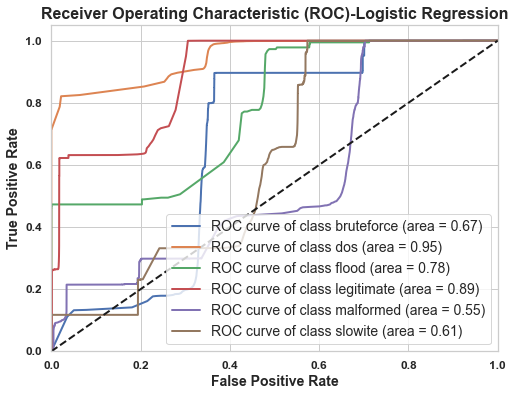

In [39]:
# Computing ROC curve and ROC area for each class-LR
n_classes = len(label_encoder.classes_)
fpr_lr = dict()
tpr_lr = dict()
roc_auc_lr = dict()
for i in range(n_classes):
    fpr_lr[i], tpr_lr[i], _ = roc_curve(y_test == i, b_lr_model.predict_proba(X_test)[:, i])
    roc_auc_lr[i] = roc_auc_score(y_test == i, b_lr_model.predict_proba(X_test)[:, i])

# Plotting ROC curve for Logistic Regression
plt.figure(figsize=(8, 6))  
for i in range(n_classes):
    plt.plot(fpr_lr[i], tpr_lr[i], label=f'ROC curve of class {label_encoder.classes_[i]} (area = {roc_auc_lr[i]:0.2f})', linewidth=2)  

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('Receiver Operating Characteristic (ROC)-Logistic Regression', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')  
plt.yticks(fontsize=12, fontweight='bold') 
plt.legend(loc="lower right", fontsize=14) 

path = '/Users/A/Documents/TEP/Figures/DPI/Multi-ROC-LR.png' 
plt.savefig(path, bbox_inches='tight', dpi=300)

plt.show()

In [49]:
#+++++++++++++++++++++++++++++++++++ Decision Tree +++++++++++++++++++++++++++++++#

In [53]:
########################################
dt_param_grid = {
    
   'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
#########################################

dt_model = DecisionTreeClassifier(random_state=42) 

grid_search_dt = GridSearchCV(dt_model, param_grid=dt_param_grid, cv=5, scoring = 'accuracy',  n_jobs=-1, verbose=2) 
start_time = time.time() # Searching start time

grid_search_dt.fit(X_train, y_train) # Fitting GridSearchCV

end_time = time.time() 
####################################

elapsed_time = end_time - start_time

print(f"The training took {elapsed_time:.2f} seconds")

best_dt_model = grid_search_dt.best_estimator_ # Getting the best model from GridSearchCV

test_start_time = time.time() # Testing start time

y_pred_dt = best_dt_model.predict(X_test) 

test_end_time = time.time() 

testing_elapsed_time = test_end_time - test_start_time

print(f"The testing took {testing_elapsed_time:.2f} seconds")

########################################################
# Best parameters#
print("Best parameters found: ", grid_search_dt.best_params_)

# Best estimator
print("Best estimator: ", grid_search_dt.best_estimator_)

########################################################

# Model Evaluation Metrics

print("accuracy")
print(accuracy_score(y_test, y_pred_dt))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Fitting 5 folds for each of 144 candidates, totalling 720 fits
The training took 9.24 seconds
The testing took 0.01 seconds
Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Best estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       random_state=42)
accuracy
0.90804887138526

Classification Report:
              precision    recall  f1-score   support

  bruteforce       0.64      0.67      0.65      4350
         dos       0.92      0.91      0.92     39070
       flood       1.00      0.46      0.63       184
  legitimate       0.92      0.99      0.95     49639
   malformed       0.85      0.32      0.47      3277
     slowite       0.83      0.50      0.63      2761

    accuracy                           0.91     99281
   macro avg       0.86      0.64      0.71     99281
weighted avg       0.91      0.91      0.90     99281


Confusion M

In [122]:
#DT with best params

In [40]:
best_params = {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}

b_dt_model = DecisionTreeClassifier(random_state=42, **best_params)

training_start_time = time.time()
b_dt_model.fit(X_train, y_train)
training_end_time = time.time()
training_elapsed_time = training_end_time - training_start_time
print(f"The training took {training_elapsed_time:.2f} seconds")

testing_start_time = time.time()
y_pred_bdt = b_dt_model.predict(X_test)
testing_end_time = time.time()

testing_elapsed_time = testing_end_time - testing_start_time
print(f"The testing took {testing_elapsed_time:.2f} seconds")

# Evaluation Metrics
print("accuracy")
print(accuracy_score(y_test, y_pred_bdt))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_bdt, target_names=label_encoder.classes_))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_bdt))
joblib.dump(b_dt_model, 'decision_tree_model_multi.pkl') 
print("Model saved successfully as 'decision_tree_model_multi.pkl'")

The training took 0.12 seconds
The testing took 0.01 seconds
accuracy
0.90804887138526

Classification Report:
              precision    recall  f1-score   support

  bruteforce       0.64      0.67      0.65      4350
         dos       0.92      0.91      0.92     39070
       flood       1.00      0.46      0.63       184
  legitimate       0.92      0.99      0.95     49639
   malformed       0.85      0.32      0.47      3277
     slowite       0.83      0.50      0.63      2761

    accuracy                           0.91     99281
   macro avg       0.86      0.64      0.71     99281
weighted avg       0.91      0.91      0.90     99281


Confusion Matrix:
[[ 2914  1012     0   170   151   103]
 [  387 35741     0  2838    19    85]
 [    2    20    84    74     4     0]
 [    2   654     0 48978     5     0]
 [ 1063   816     0   257  1053    88]
 [  182   504     0   682    11  1382]]
Model saved successfully as 'decision_tree_model_multi.pkl'


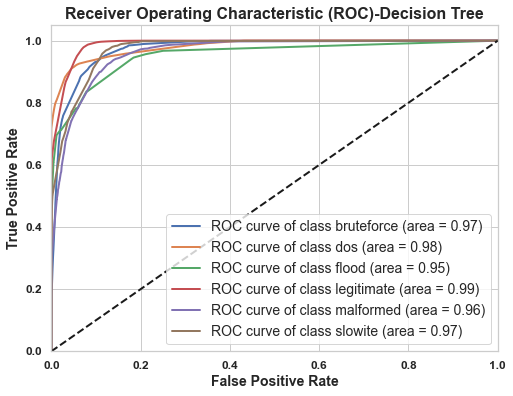

In [41]:
# Computing ROC curve and ROC area for each class-DT
n_classes = len(label_encoder.classes_)
fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()
for i in range(n_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test == i, b_dt_model.predict_proba(X_test)[:, i])
    roc_auc_dt[i] = roc_auc_score(y_test == i, b_dt_model.predict_proba(X_test)[:, i])

# Plot ROC curve for Decision Tree
plt.figure(figsize=(8, 6))  
for i in range(n_classes):
    plt.plot(fpr_dt[i], tpr_dt[i], label=f'ROC curve of class {label_encoder.classes_[i]} (area = {roc_auc_dt[i]:0.2f})', linewidth=2)  

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('Receiver Operating Characteristic (ROC)-Decision Tree', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')  
plt.yticks(fontsize=12, fontweight='bold') 
plt.legend(loc="lower right", fontsize=14) 

path = '/Users/A/Documents/TEP/Figures/DPI/Multi-ROC-DT.png' 
plt.savefig(path, bbox_inches='tight', dpi=300)

plt.show()

In [55]:

########################################
gbc_param_grid = {
   'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
#########################################

gbc_model = GradientBoostingClassifier(random_state=42) 
grid_search_gbc = GridSearchCV(estimator=gbc_model, param_grid=gbc_param_grid, cv=5, n_jobs=-1, verbose=2) 
start_time = time.time() # Searching start time

grid_search_gbc.fit(X_train, y_train) # Fitting GridSearchCV

end_time = time.time() # Training end time
####################################

elapsed_time = end_time - start_time

print(f"The training took {elapsed_time:.2f} seconds")
    
best_gbc_model = grid_search_gbc.best_estimator_ 

test_start_time = time.time() # Testing start time

y_pred_gbc = best_gbc_model.predict(X_test)

test_end_time = time.time() 
testing_elapsed_time = test_end_time - test_start_time

print(f"The testing took {testing_elapsed_time:.2f} seconds")

########################################################
#Best parameters &&& Best Estimator
print("Best parameters found: ", grid_search_gbc.best_params_)
print("Best estimator: ", grid_search_gbc.best_estimator_)
########################################################

# Model Evaluation Metrics

print("accuracy")
print(accuracy_score(y_test, y_pred_gbc))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gbc, target_names=label_encoder.classes_ ))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbc))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
The training took 24489.46 seconds
The testing took 5.58 seconds
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 300}
Best estimator:  GradientBoostingClassifier(learning_rate=0.01, max_depth=7, min_samples_leaf=10,
                           n_estimators=300, random_state=42)
accuracy
0.9082402473786525

Classification Report:
              precision    recall  f1-score   support

  bruteforce       0.64      0.67      0.66      4350
         dos       0.92      0.91      0.92     39070
       flood       1.00      0.46      0.63       184
  legitimate       0.92      0.99      0.95     49639
   malformed       0.85      0.32      0.47      3277
     slowite       0.85      0.50      0.63      2761

    accuracy                           0.91     99281
   macro avg       0.86      0.64      0.71     99281
weighted avg       0.91      0.91     

In [ ]:
#GBC with best params

In [42]:
best_params = {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 300}

b_gb_model = GradientBoostingClassifier(random_state=42, **best_params)

training_start_time = time.time()
b_gb_model.fit(X_train, y_train)
training_end_time = time.time()
training_elapsed_time = training_end_time - training_start_time
print(f"The training took {training_elapsed_time:.2f} seconds")

testing_start_time = time.time()
y_pred_bgb = b_gb_model.predict(X_test)
testing_end_time = time.time()

testing_elapsed_time = testing_end_time - testing_start_time
print(f"The testing took {testing_elapsed_time:.2f} seconds")

# Evaluation Metrics
print("accuracy")
print(accuracy_score(y_test, y_pred_bgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_bgb, target_names=label_encoder.classes_))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_bgb))

The training took 485.32 seconds
The testing took 4.76 seconds
accuracy
0.9082402473786525

Classification Report:
              precision    recall  f1-score   support

  bruteforce       0.64      0.67      0.66      4350
         dos       0.92      0.91      0.92     39070
       flood       1.00      0.46      0.63       184
  legitimate       0.92      0.99      0.95     49639
   malformed       0.85      0.32      0.47      3277
     slowite       0.85      0.50      0.63      2761

    accuracy                           0.91     99281
   macro avg       0.86      0.64      0.71     99281
weighted avg       0.91      0.91      0.90     99281


Confusion Matrix:
[[ 2932  1018     0   170   142    88]
 [  383 35745     0  2844    21    77]
 [    3    20    84    74     3     0]
 [    2   654     0 48974     9     0]
 [ 1074   817     0   254  1052    80]
 [  180   499     0   682    16  1384]]


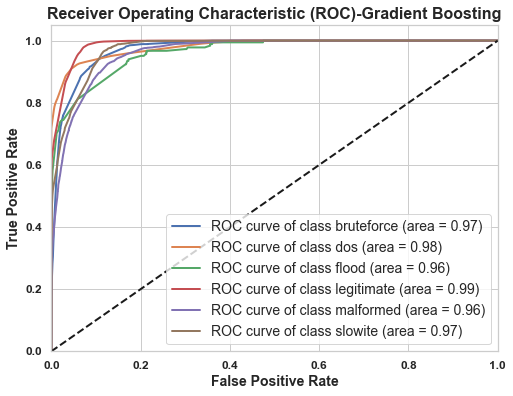

In [44]:
# Compute ROC curve and ROC area for each class
n_classes = len(label_encoder.classes_)
fpr_gb = dict()
tpr_gb = dict()
roc_auc_gb = dict()
for i in range(n_classes):
    fpr_gb[i], tpr_gb[i], _ = roc_curve(y_test == i, b_gb_model.predict_proba(X_test)[:, i])
    roc_auc_gb[i] = roc_auc_score(y_test == i, b_gb_model.predict_proba(X_test)[:, i])

# Plot ROC curve for Gradient Boosting
plt.figure(figsize=(8, 6))  
for i in range(n_classes):
    plt.plot(fpr_gb[i], tpr_gb[i], label=f'ROC curve of class {label_encoder.classes_[i]} (area = {roc_auc_gb[i]:0.2f})', linewidth=2)  

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('Receiver Operating Characteristic (ROC)-Gradient Boosting', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')  
plt.yticks(fontsize=12, fontweight='bold') 
plt.legend(loc="lower right", fontsize=14) 

path = '/Users/A/Documents/TEP/Figures/DPI/Multi-ROC-GB.png' 
plt.savefig(path, bbox_inches='tight', dpi=300)

plt.show()

In [57]:
############ Extreme Gradient Boosting model ############

In [39]:


########################################
xgboost_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
#########################################

xgboost_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') 
grid_search_xgb = GridSearchCV(estimator=xgboost_model, param_grid=xgboost_param_grid, cv=5, n_jobs=-1, verbose=2) # Initializing GridSearchCV

start_time = time.time() # Searching start time

grid_search_xgb.fit(X_train, y_train) # Fitting GridSearchCV

end_time = time.time() # Training end time
####################################

elapsed_time = end_time - start_time

print(f"The training took {elapsed_time:.2f} seconds")
    
best_xgboost_model = grid_search_xgb.best_estimator_ # Getting the best model from GridSearchCV

test_start_time = time.time() # Testing start time

y_pred_xgboost = best_xgboost_model.predict(X_test) 
test_end_time = time.time()

testing_elapsed_time = test_end_time - test_start_time

print(f"The testing took {testing_elapsed_time:.2f} seconds")

########################################################
#Best parameters &&& Best Estimator
print("Best parameters found: ", grid_search_xgb.best_params_)
print("Best estimator: ", grid_search_xgb.best_estimator_)
########################################################

# Model Evaluation Metrics

print("accuracy")
print(accuracy_score(y_test, y_pred_xgboost))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgboost, target_names=label_encoder.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgboost))

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
The training took 49323.92 seconds
The testing took 0.07 seconds
Best parameters found:  {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}
Best estimator:  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0.1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=7, max_leaves=0,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_s

In [128]:
#XGBoost with best params

In [45]:
best_params = {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3,
               'n_estimators': 100, 'subsample': 0.8}

b_xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') 

training_start_time = time.time()
b_xgb_model.fit(X_train, y_train)
training_end_time = time.time()
training_elapsed_time = training_end_time - training_start_time
print(f"The training took {training_elapsed_time:.2f} seconds")

testing_start_time = time.time()
y_pred_bxgb = b_xgb_model.predict(X_test)
testing_end_time = time.time()

testing_elapsed_time = testing_end_time - testing_start_time
print(f"The testing took {testing_elapsed_time:.2f} seconds")

# Evaluation Metrics
print("accuracy")
print(accuracy_score(y_test, y_pred_bxgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_bxgb, target_names=label_encoder.classes_))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_bxgb))

The training took 15.97 seconds
The testing took 0.10 seconds
accuracy
0.9085927821033228

Classification Report:
              precision    recall  f1-score   support

  bruteforce       0.65      0.67      0.66      4350
         dos       0.92      0.92      0.92     39070
       flood       1.00      0.47      0.64       184
  legitimate       0.92      0.99      0.95     49639
   malformed       0.86      0.32      0.47      3277
     slowite       0.83      0.51      0.63      2761

    accuracy                           0.91     99281
   macro avg       0.86      0.65      0.71     99281
weighted avg       0.91      0.91      0.90     99281


Confusion Matrix:
[[ 2913  1026     0   170   133   108]
 [  375 35753     0  2838    22    82]
 [    3    19    86    74     2     0]
 [    2   654     0 48976     7     0]
 [ 1051   819     0   252  1062    93]
 [  143   504     0   682    16  1416]]


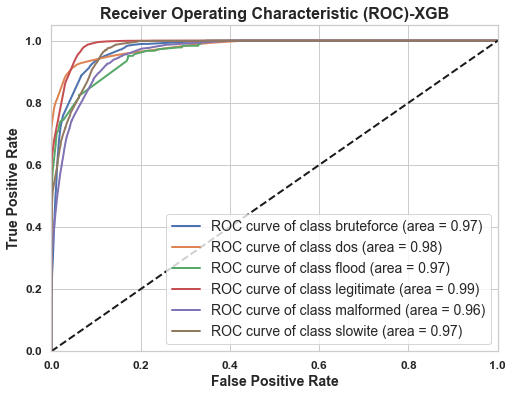

In [47]:
# Computing ROC curve and ROC area for each class-xgboost
n_classes = len(label_encoder.classes_)
fpr_xgboost = dict()
tpr_xgboost = dict()
roc_auc_xgboost = dict()
for i in range(n_classes):
    fpr_xgboost[i], tpr_xgboost[i], _ = roc_curve(y_test == i, b_xgb_model.predict_proba(X_test)[:, i])
    roc_auc_xgboost[i] = roc_auc_score(y_test == i, b_xgb_model.predict_proba(X_test)[:, i])

# Plot ROC curve for XGradient Boosting
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_xgboost[i], tpr_xgboost[i], label=f'ROC curve of class {label_encoder.classes_[i]} (area = {roc_auc_xgboost[i]:0.2f})', linewidth=2) 

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('Receiver Operating Characteristic (ROC)-XGB', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')  
plt.yticks(fontsize=12, fontweight='bold') 
plt.legend(loc="lower right", fontsize=14) 

path = '/Users/A/Documents/TEP/Figures/DPI/Multi-ROC-XGB.png' 
plt.savefig(path, bbox_inches='tight', dpi=300)

plt.show()

In [42]:
##################################### MLPClassifier ######################################################

In [41]:
########################################
mlp_param_grid = {
    'hidden_layer_sizes': [(50, 50), (100,), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}
#########################################


mlp_model=MLPClassifier(random_state=42, max_iter=200)

mlp_grid_search = GridSearchCV(mlp_model, param_grid=mlp_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2) 

start_time = time.time() # Searching start time
mlp_grid_search.fit(X_train, y_train) # Fitting GridSearchCV
end_time = time.time() 

####################################

elapsed_time = end_time - start_time

print(f"The training took {elapsed_time:.2f} seconds")

best_mlp_model = mlp_grid_search.best_estimator_ 
test_start_time = time.time() # Testing start time

y_pred_mlp = best_mlp_model.predict(X_test) 

test_end_time = time.time() 
testing_elapsed_time = test_end_time - test_start_time

print(f"The testing took {testing_elapsed_time:.2f} seconds")

########################################################
# Best parameters#
print("Best parameters found: ", mlp_grid_search.best_params_)

########################################################

# Model Evaluation Metrics

print("accuracy")
print(accuracy_score(y_test, y_pred_mlp))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp, target_names=label_encoder.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
The training took 3573.60 seconds
The testing took 0.35 seconds
Best parameters found:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'solver': 'adam'}
accuracy
0.8522375882595864

Classification Report:
              precision    recall  f1-score   support

  bruteforce       0.63      0.68      0.65      4350
         dos       0.94      0.80      0.86     39070
       flood       0.69      0.47      0.56       184
  legitimate       0.83      0.98      0.89     49639
   malformed       0.81      0.19      0.31      3277
     slowite       0.78      0.49      0.60      2761

    accuracy                           0.85     99281
   macro avg       0.78      0.60      0.65     99281
weighted avg       0.86      0.85      0.84     99281


Confusion Matrix:
[[ 2957   383     3   804   117    86]
 [  409 31133     3  7435    27    63]
 [    2    12    87    82     1     0

In [130]:
#MLP with best params 

In [48]:
best_params = {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant',
               'solver': 'adam'}

b_mlp_model = MLPClassifier(random_state=42, max_iter=200) 

training_start_time = time.time()
b_mlp_model.fit(X_train, y_train)
training_end_time = time.time()
training_elapsed_time = training_end_time - training_start_time
print(f"The training took {training_elapsed_time:.2f} seconds")

testing_start_time = time.time()
y_pred_bmlp = b_mlp_model.predict(X_test)
testing_end_time = time.time()

testing_elapsed_time = testing_end_time - testing_start_time
print(f"The testing took {testing_elapsed_time:.2f} seconds")

# Evaluation Metrics
print("accuracy")
print(accuracy_score(y_test, y_pred_bmlp))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_bmlp, target_names=label_encoder.classes_))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_bmlp))

The training took 127.49 seconds
The testing took 0.11 seconds
accuracy
0.8158257874114886

Classification Report:
              precision    recall  f1-score   support

  bruteforce       0.55      0.41      0.47      4350
         dos       0.98      0.72      0.83     39070
       flood       1.00      0.45      0.62       184
  legitimate       0.75      1.00      0.86     49639
   malformed       0.91      0.15      0.26      3277
     slowite       0.92      0.34      0.50      2761

    accuracy                           0.82     99281
   macro avg       0.85      0.51      0.59     99281
weighted avg       0.85      0.82      0.80     99281


Confusion Matrix:
[[ 1781   242     0  2303    16     8]
 [  179 28080     0 10797    14     0]
 [    3     3    83    94     1     0]
 [    0     0     0 49621    18     0]
 [  765   118     0  1832   489    73]
 [  529    88     0  1202     0   942]]


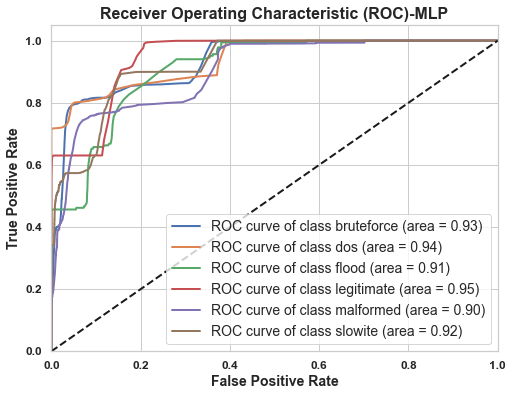

In [49]:
# Computing ROC curve and ROC area for each class-MLP
n_classes = len(label_encoder.classes_)
fpr_mlp = dict()
tpr_mlp = dict()
roc_auc_mlp = dict()
for i in range(n_classes):
    fpr_mlp[i], tpr_mlp[i], _ = roc_curve(y_test == i, b_mlp_model.predict_proba(X_test)[:, i])
    roc_auc_mlp[i] = roc_auc_score(y_test == i, b_mlp_model.predict_proba(X_test)[:, i])
    
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_mlp[i], tpr_mlp[i], label=f'ROC curve of class {label_encoder.classes_[i]} (area = {roc_auc_mlp[i]:0.2f})',linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('Receiver Operating Characteristic (ROC)-MLP', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')  
plt.yticks(fontsize=12, fontweight='bold') 
plt.legend(loc="lower right", fontsize=14) 

path = '/Users/A/Documents/TEP/Figures/DPI/Multi-ROC-MLP.png' 
plt.savefig(path, bbox_inches='tight', dpi=300)

plt.show()

In [ ]:
####################### Deep Neural Network #################################### 

In [136]:
label_encoder = LabelEncoder()
df_significant['target'] = label_encoder.fit_transform(df_significant['target'])
X = df_significant.drop(columns=['target'])
y = df_significant['target']
one_hot_encoder = OneHotEncoder(sparse_output=False)
y_one_hot = one_hot_encoder.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# the hypermodel for Keras Tuner
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
        model.add(Dropout(hp.Float('dropout_rate', 0.3, 0.7, step=0.1)))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(hp.Float('dropout_rate', 0.3, 0.7, step=0.1)))
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(hp.Float('dropout_rate', 0.3, 0.7, step=0.1)))
        model.add(Dense(y_train.shape[1], activation='softmax'))  
        
        model.compile(
            optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

hypermodel = MyHyperModel()

# the tuner
tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='hyperparameter_tuning',
    project_name='multi_class'
)

# time for hyperparameter tuning
start_time_tuning = time.time()
tuner.search(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)
end_time_tuning = time.time()

elapsed_time_tuning = end_time_tuning - start_time_tuning
print(f"The hyperparameter tuning took {elapsed_time_tuning:.2f} seconds")

# the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

gc.collect()
tf.keras.backend.clear_session()

best_model = hypermodel.build(best_hps)

# the training time for the best model
start_time_training = time.time()
history = best_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)
end_time_training = time.time()

elapsed_time_training = end_time_training - start_time_training
print(f"The training took {elapsed_time_training:.2f} seconds")

test_start_time = time.time()
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
test_end_time = time.time()

testing_elapsed_time = test_end_time - test_start_time
print(f"The testing took {testing_elapsed_time:.2f} seconds")

# Evaluation Metrics
loss, accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print("\nConfusion Matrix:")
print(confusion_matrix(y_true_classes, y_pred_classes))
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))

Reloading Tuner from hyperparameter_tuning\multi_class\tuner0.json
The hyperparameter tuning took 0.00 seconds
Best hyperparameters: {'dropout_rate': 0.3, 'learning_rate': 0.006774973687719226}
Epoch 1/20
5792/5792 [==============================] - 33s 6ms/step - loss: 0.6818 - accuracy: 0.7793 - val_loss: 0.6526 - val_accuracy: 0.7834
Epoch 2/20
5792/5792 [==============================] - 35s 6ms/step - loss: 0.6651 - accuracy: 0.7812 - val_loss: 0.6535 - val_accuracy: 0.7806
Epoch 3/20
5792/5792 [==============================] - 35s 6ms/step - loss: 0.6659 - accuracy: 0.7812 - val_loss: 0.6460 - val_accuracy: 0.7860
Epoch 4/20
5792/5792 [==============================] - 35s 6ms/step - loss: 0.6758 - accuracy: 0.7816 - val_loss: 0.6491 - val_accuracy: 0.7843
Epoch 5/20
5792/5792 [==============================] - 35s 6ms/step - loss: 0.6635 - accuracy: 0.7819 - val_loss: 0.6578 - val_accuracy: 0.7819
Epoch 6/20
5792/5792 [==============================] - 35s 6ms/step - loss: 0.67

C:\Users\A\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

3103/3103 [==============================] - 5s 2ms/step


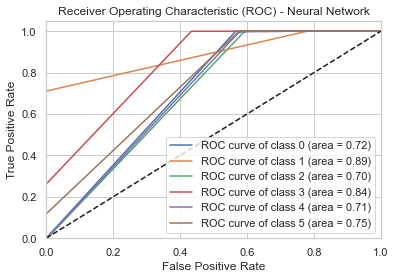

In [157]:

y_pred = best_model.predict(X_test)
n_classes = y_test.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(6, 4))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Neural Network')
plt.legend(loc="lower right")
path = '/Users/A/Documents/TEP/Figures/Multi-ROC-DNN-2.png'
plt.savefig(path, bbox_inches='tight')
plt.show()
